In [1]:
#PART A
#Step: 1A

#importing necessary libraries.


import pandas as pd
pd.set_option('max_colwidth',None)
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from PIL import Image
import re
import string
import unidecode
from autocorrect import Speller
import nltk

import zipfile

import os
import tqdm
from tqdm import tqdm_notebook


#the dataset is in zipped folder.
#unzipping the folder to extract the dataset blogtext.

def unzipfile(file,destfolder):
    if (os.path.isdir(destfolder)==False):
      with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(destfolder) 
IS_LOCAL = True
if(IS_LOCAL):
    #full path
    PATH="/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1"
else:
    PATH="../input/"
    
files=os.listdir(PATH)

for f in files:
    if f.endswith('.zip'):
        filename=f.split('.')[0]
        unzipfile(PATH+'/'+f,PATH+'/'+filename)
        
print(os.listdir(PATH))

C:\Users\amitr\anaconda3\envs\myenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\amitr\anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\amitr\anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


['blogs', 'blogs.zip', 'Copy of NewData', 'GL Bot.json', 'Milestone-NLP+1.pdf', 'NLP+FAQ+Stat.pdf', 'NLP-1_Problem Statement.pdf', 'NLP1_Model.pckl', 'Project1 PythonFiles']


In [2]:
#reading the csv file and creating the dataset

dataset = pd.read_csv(PATH+'/blogs/blogtext.csv')

In [3]:
#making a copy of the dataset.

data = dataset.copy()

In [4]:
# Clearly write outcome of data analysis(Minimum 2 points).
#doing the data analysis on the new dataset.

data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail


In [5]:
#checking the datatype of the attributes present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [6]:
data.shape

(681284, 7)

In [64]:
#Observation: Here, above we can observe that the there are total 7 columns are present in the dataset.
# total number of records present in the dataset are 681284
# columns id & age are of integer datatype
# and the remaining 5 columns are of object datatype.

In [7]:
#checking the total sum of null values in each column.

data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [66]:
#observation: there are no null values present in any of the attributes.

In [8]:
#checking the unique values in the target column "topic".

data['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [9]:
#Step: 1B (i)
#clean the unstructured data.

#Missing value analysis and imputation

data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [69]:
#here, we observe that there are no missing values present in the dataset.

In [10]:
#checking for the duplicate values.

data.duplicated().sum()

4686

In [71]:
#here, we can observe that total 4686 duplicate rows are present.

In [11]:
# dropping the duplicate rows.
data = data.drop_duplicates(keep = 'first')


In [12]:
# again checking for duplicate values
data.duplicated().sum()

0

In [74]:
#duplicate values are removed now.

In [13]:
# resetting the index of the dataframe.

data = data.reset_index(drop = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676598 entries, 0 to 676597
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      676598 non-null  int64 
 1   gender  676598 non-null  object
 2   age     676598 non-null  int64 
 3   topic   676598 non-null  object
 4   sign    676598 non-null  object
 5   date    676598 non-null  object
 6   text    676598 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.1+ MB


In [77]:
#Step: 1B (ii)
# Eliminate Non-English textual data.

#installing the langdetect library.

!pip install langdetect

In [2]:
from langdetect import detect

In [3]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [17]:
data2 = data.copy()

In [18]:
data2.head(5)

id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [19]:
def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [108]:
data2 = data2[data2['text'].apply(detect_english)]

In [110]:
data2.to_csv(r'C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/New_Data.csv')

In [55]:
data_new = pd.read_csv('C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/New_Data.csv')

In [56]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [57]:
data_new = data_new.reset_index(drop = True)

In [58]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [59]:
data_new.shape

(649125, 8)

In [ ]:
#observation: Above, we can see that the non-english textual data has been eliminated using the langdetect library.

In [4]:
#Step: 2A
#Preprocess unstructured data to make it consumable for model training.

#Eliminate All special Characters and Numbers.

# Importing the NLTK library

import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords

In [6]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk

In [29]:
!pip install spacy

  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached pathy-0.10.2-py3-none-any.whl (48 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached confection-0.1.0-py3-none-any.whl (34 kB)
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7681 sha256=6781f92deed9a0ea4b2c0c0644c5db29e3cb335778455d81672c482a53780339
  Stored in directory: c:\users\amitr\appdata\local\pip\cache\wheels\41\11\53\911724983aa48deb94792432e14e518447212dd6c5477d49d3
Successfully built contextvars


In [8]:
#checking the version of the spacy installed.

import spacy
print(spacy.__version__)

3.6.0


In [31]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
spacy.load('en_core_web_sm')

In [9]:
from spacy.lang.en import English
en_nlp = English()

In [35]:
!pip install unidecode
!pip install autocorrect

In [60]:
#Eliminate All special Characters and Numbers.
import re
data_new['text'] = data_new['text'].str.replace('\d+', '', regex=True)

In [61]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
#Observation: Here we can see from above that the numbers have been removed from the text column.

In [62]:
data_new.tail()

,Unnamed: 0,id,gender,age,topic,sign,date,text
649120,676593,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really bitter diatribe about you and your disease spreading cunt. Instead I'll just say this: everyone hates you, and we always will. Kill yourself and make this world a better place. Love always, Stolenswan"
649121,676594,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast infection in past two months straight on the heels of my second bacterial infection in the same time period. i'm sure you guys didn't want to know that but yeah, talking about physical hell and all. -- Ask For Samantha (...), June th, .' Get it straight nobody wants to know about your dirty pussy. Grimlins with elf hats, Talia"
649122,676595,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fucking BALD! Good luck with that..."
649123,676596,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am asking you to leave my house, Why? because you shit and piss on the floor and then you try to hump my leg, frankly I don't need your shit stained undies touching my pants. So now that I am kicking your hail damaged cottge cheese ass to the curb, You can make me a sandwich you fuckin bitch!"
649124,676597,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might already know me. My name's Weird Al Yankovic. I have been getting tired of writing my wacky song parodies about food (I've been doing it for almost years now!) and was getting burned out. Then I discovered this wonderful site called 'Dear Susan'. So now I've decided to devote my sardonic songwriting skills to penning parodies about the pariah named Susan. I'll be posting bits and pieces of works in progress on here from time to time for your perusal and enjoyment. Here's two very rough parodies I've been working on lately. Best Regards! Ass Junkie (to the tune of the Beastie Boys’ “Brass Monkey”) Ass Junkie Your trunk is funky And skunky, drunkie You’re such a flunky Your ass has a stench that’s so unreal You’re an Ass Junkie but that's how you deal Put your left leg down your right leg up Tilt your head back and guzzle my spunk Your Dad with the bottle, King rocks your can Susan gives ass to every man... Cum Where You Will (to the tune of Nirvana’s “Come As You Are”) Cum where you will In my ass On my grill Where you want Take your fill Fuck my cunt Or my rump Spread my cheeeeeks, yeah Spread my cheeeeeks, yeah And I swear that I don’t have the HIV No, I don’t have the HIV..."


In [53]:
#data_new['text'] = data_new['text'].str.replace('\W', '', regex=True)

In [64]:
# importing regex library
import re


# defining an empty list
text = []

# Specifying the pattern for regex to match a string of characters that are not a letters or numbers 
# regex will look for alphabets A to Z, a to z, and numbers 0 to 9
pattern = '[^A-Za-z0-9]+'

# looping over each message in the data
for i in range(data_new.shape[0]):

    words = data_new['text'][i].split() # splitting text into separate words
    new_text = ''.join(re.sub(pattern, ' ', data_new['text'][i])) # finding the pattern and using the join() function to retrive the original text
    text.append(new_text) # append the new_text to empty list text
    
data_new['text'] = text  

In [65]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [66]:
data_new.tail()

,Unnamed: 0,id,gender,age,topic,sign,date,text
649120,676593,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan I could write some really bitter diatribe about you and your disease spreading cunt Instead I ll just say this everyone hates you and we always will Kill yourself and make this world a better place Love always Stolenswan
649121,676594,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan I have the second yeast infection in past two months straight on the heels of my second bacterial infection in the same time period i m sure you guys didn t want to know that but yeah talking about physical hell and all Ask For Samantha June th Get it straight nobody wants to know about your dirty pussy Grimlins with elf hats Talia
649122,676595,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan Your boyfriend is fucking BALD Good luck with that
649123,676596,1713845,male,23,Student,Taurus,"01,July,2004",Dear Susan Just to clarify I am asking you to leave my house Why because you shit and piss on the floor and then you try to hump my leg frankly I don t need your shit stained undies touching my pants So now that I am kicking your hail damaged cottge cheese ass to the curb You can make me a sandwich you fuckin bitch
649124,676597,1713845,male,23,Student,Taurus,"01,July,2004",Hey everybody and Susan You might already know me My name s Weird Al Yankovic I have been getting tired of writing my wacky song parodies about food I ve been doing it for almost years now and was getting burned out Then I discovered this wonderful site called Dear Susan So now I ve decided to devote my sardonic songwriting skills to penning parodies about the pariah named Susan I ll be posting bits and pieces of works in progress on here from time to time for your perusal and enjoyment Here s two very rough parodies I ve been working on lately Best Regards Ass Junkie to the tune of the Beastie Boys Brass Monkey Ass Junkie Your trunk is funky And skunky drunkie You re such a flunky Your ass has a stench that s so unreal You re an Ass Junkie but that s how you deal Put your left leg down your right leg up Tilt your head back and guzzle my spunk Your Dad with the bottle King rocks your can Susan gives ass to every man Cum Where You Will to the tune of Nirvana s Come As You Are Cum where you will In my ass On my grill Where you want Take your fill Fuck my cunt Or my rump Spread my cheeeeeks yeah Spread my cheeeeeks yeah And I swear that I don t have the HIV No I don t have the HIV


In [ ]:
#observation: here, we observe that the special characters are also successfully removed from the text column.

In [67]:
data_new.shape

(649125, 8)

In [68]:
#Step: 2B
#Lowercase all textual data.

# defining an empty list
text = []

# looping over each message in the data
for i in range(data_new.shape[0]):
    # lowecasing the text using the lower() function
    new_text = data_new['text'][i].lower()
    text.append(new_text) # append the new_text to empty list text

data_new['text'] = text

In [69]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [70]:
data_new.tail()

,Unnamed: 0,id,gender,age,topic,sign,date,text
649120,676593,1713845,male,23,Student,Taurus,"01,July,2004",dear susan i could write some really bitter diatribe about you and your disease spreading cunt instead i ll just say this everyone hates you and we always will kill yourself and make this world a better place love always stolenswan
649121,676594,1713845,male,23,Student,Taurus,"01,July,2004",dear susan i have the second yeast infection in past two months straight on the heels of my second bacterial infection in the same time period i m sure you guys didn t want to know that but yeah talking about physical hell and all ask for samantha june th get it straight nobody wants to know about your dirty pussy grimlins with elf hats talia
649122,676595,1713845,male,23,Student,Taurus,"01,July,2004",dear susan your boyfriend is fucking bald good luck with that
649123,676596,1713845,male,23,Student,Taurus,"01,July,2004",dear susan just to clarify i am asking you to leave my house why because you shit and piss on the floor and then you try to hump my leg frankly i don t need your shit stained undies touching my pants so now that i am kicking your hail damaged cottge cheese ass to the curb you can make me a sandwich you fuckin bitch
649124,676597,1713845,male,23,Student,Taurus,"01,July,2004",hey everybody and susan you might already know me my name s weird al yankovic i have been getting tired of writing my wacky song parodies about food i ve been doing it for almost years now and was getting burned out then i discovered this wonderful site called dear susan so now i ve decided to devote my sardonic songwriting skills to penning parodies about the pariah named susan i ll be posting bits and pieces of works in progress on here from time to time for your perusal and enjoyment here s two very rough parodies i ve been working on lately best regards ass junkie to the tune of the beastie boys brass monkey ass junkie your trunk is funky and skunky drunkie you re such a flunky your ass has a stench that s so unreal you re an ass junkie but that s how you deal put your left leg down your right leg up tilt your head back and guzzle my spunk your dad with the bottle king rocks your can susan gives ass to every man cum where you will to the tune of nirvana s come as you are cum where you will in my ass on my grill where you want take your fill fuck my cunt or my rump spread my cheeeeeks yeah spread my cheeeeeks yeah and i swear that i don t have the hiv no i don t have the hiv


In [ ]:
#observation: the strings in the text columns has been converted to lowercase.

In [74]:
#Step: 2C
#Remove all Stopwords.

#checking for 100 unique words using word cloud.

!pip install wordcloud

In [11]:
# Loading the english language small model of spacy
import re
en = spacy.load('en_core_web_sm')

# loading the stopwords
spacy_stopwords = en.Defaults.stop_words

In [78]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data_new.shape[0]):
  t = data_new['text'][i].split() # splitting text into separate words 
  # Removing the words that are present in the stopwords
  words = [word for word in t if not word in spacy_stopwords] 
  words = ' '.join(words) #retriving the original text
  text.append(words) # append the new_text to empty list text
    
data_new['text'] = text 

In [79]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [80]:
data_new.tail()

,Unnamed: 0,id,gender,age,topic,sign,date,text
649120,676593,1713845,male,23,Student,Taurus,"01,July,2004",dear susan write bitter diatribe disease spreading cunt instead ll hates kill world better place love stolenswan
649121,676594,1713845,male,23,Student,Taurus,"01,July,2004",dear susan second yeast infection past months straight heels second bacterial infection time period m sure guys didn t want know yeah talking physical hell ask samantha june th straight wants know dirty pussy grimlins elf hats talia
649122,676595,1713845,male,23,Student,Taurus,"01,July,2004",dear susan boyfriend fucking bald good luck
649123,676596,1713845,male,23,Student,Taurus,"01,July,2004",dear susan clarify asking leave house shit piss floor try hump leg frankly don t need shit stained undies touching pants kicking hail damaged cottge cheese ass curb sandwich fuckin bitch
649124,676597,1713845,male,23,Student,Taurus,"01,July,2004",hey everybody susan know s weird al yankovic getting tired writing wacky song parodies food ve years getting burned discovered wonderful site called dear susan ve decided devote sardonic songwriting skills penning parodies pariah named susan ll posting bits pieces works progress time time perusal enjoyment s rough parodies ve working lately best regards ass junkie tune beastie boys brass monkey ass junkie trunk funky skunky drunkie flunky ass stench s unreal ass junkie s deal left leg right leg tilt head guzzle spunk dad bottle king rocks susan gives ass man cum tune nirvana s come cum ass grill want fill fuck cunt rump spread cheeeeeks yeah spread cheeeeeks yeah swear don t hiv don t hiv


In [ ]:
#observation: here above we observe that the stop words have been removed.

In [81]:
#Step: 2D
#Remove all extra white spaces.

# defining an empty list
text = []

# looping over each message in the data
for i in range(data_new.shape[0]):
    # removing extra spaces from the text using strip() function
    new_text = data_new['text'][i].strip() 
    text.append(new_text)  # append the new_text to empty list text
    
data_new['text'] = text

In [82]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [84]:
#removing accented characters from the text column to make the text column more efficient for model training.

# defining an empty list
text = []

# looping over each message in the data
for i in range(data_new.shape[0]):

    t = data_new['text'][i].split()
    # Applying the unicode data on a sentence and replacing the accented words to get the closest possible ASCII text
    new_text = [unidecode.unidecode(word) for word in t]
    
    # Combining the seperate words into sentence
    new_text = ' '.join(new_text)
    # append the new_text to list text
    text.append(new_text)

data_new['text'] = text

In [88]:
data_new.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           2  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [90]:
data_new.tail()

,Unnamed: 0,id,gender,age,topic,sign,date,text
649120,676593,1713845,male,23,Student,Taurus,"01,July,2004",dear susan write bitter diatribe disease spreading cunt instead ll hates kill world better place love stolenswan
649121,676594,1713845,male,23,Student,Taurus,"01,July,2004",dear susan second yeast infection past months straight heels second bacterial infection time period m sure guys didn t want know yeah talking physical hell ask samantha june th straight wants know dirty pussy grimlins elf hats talia
649122,676595,1713845,male,23,Student,Taurus,"01,July,2004",dear susan boyfriend fucking bald good luck
649123,676596,1713845,male,23,Student,Taurus,"01,July,2004",dear susan clarify asking leave house shit piss floor try hump leg frankly don t need shit stained undies touching pants kicking hail damaged cottge cheese ass curb sandwich fuckin bitch
649124,676597,1713845,male,23,Student,Taurus,"01,July,2004",hey everybody susan know s weird al yankovic getting tired writing wacky song parodies food ve years getting burned discovered wonderful site called dear susan ve decided devote sardonic songwriting skills penning parodies pariah named susan ll posting bits pieces works progress time time perusal enjoyment s rough parodies ve working lately best regards ass junkie tune beastie boys brass monkey ass junkie trunk funky skunky drunkie flunky ass stench s unreal ass junkie s deal left leg right leg tilt head guzzle spunk dad bottle king rocks susan gives ass man cum tune nirvana s come cum ass grill want fill fuck cunt rump spread cheeeeeks yeah spread cheeeeeks yeah swear don t hiv don t hiv


In [92]:
data_new.shape

(649125, 8)

In [94]:
data_new.drop(columns=data_new.columns[0], inplace=True, axis=1)

In [95]:
data_new.head(2)

id gender  age    topic sign         date  \
0  2059027   male   15  Student  Leo  14,May,2004   
1  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [96]:
data_new.tail()

,id,gender,age,topic,sign,date,text
649120,1713845,male,23,Student,Taurus,"01,July,2004",dear susan write bitter diatribe disease spreading cunt instead ll hates kill world better place love stolenswan
649121,1713845,male,23,Student,Taurus,"01,July,2004",dear susan second yeast infection past months straight heels second bacterial infection time period m sure guys didn t want know yeah talking physical hell ask samantha june th straight wants know dirty pussy grimlins elf hats talia
649122,1713845,male,23,Student,Taurus,"01,July,2004",dear susan boyfriend fucking bald good luck
649123,1713845,male,23,Student,Taurus,"01,July,2004",dear susan clarify asking leave house shit piss floor try hump leg frankly don t need shit stained undies touching pants kicking hail damaged cottge cheese ass curb sandwich fuckin bitch
649124,1713845,male,23,Student,Taurus,"01,July,2004",hey everybody susan know s weird al yankovic getting tired writing wacky song parodies food ve years getting burned discovered wonderful site called dear susan ve decided devote sardonic songwriting skills penning parodies pariah named susan ll posting bits pieces works progress time time perusal enjoyment s rough parodies ve working lately best regards ass junkie tune beastie boys brass monkey ass junkie trunk funky skunky drunkie flunky ass stench s unreal ass junkie s deal left leg right leg tilt head guzzle spunk dad bottle king rocks susan gives ass man cum tune nirvana s come cum ass grill want fill fuck cunt rump spread cheeeeeks yeah spread cheeeeeks yeah swear don t hiv don t hiv


In [97]:
data_new.to_csv(r'C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/df.csv')

In [12]:
df1 = pd.read_csv("C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/df.csv")

In [13]:
df1.head(2)

Unnamed: 0       id gender  age    topic sign         date  \
0           0  2059027   male   15  Student  Leo  14,May,2004   
1           1  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [14]:
#removing the unnamed 1st column which is created while re-loading the dataset.

df1.drop(columns=df1.columns[0], inplace=True, axis=1)

In [15]:
df1.head(2)

id gender  age    topic sign         date  \
0  2059027   male   15  Student  Leo  14,May,2004   
1  2059027   male   15  Student  Leo  12,May,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [16]:
df1.tail()

,id,gender,age,topic,sign,date,text
649120,1713845,male,23,Student,Taurus,"01,July,2004",dear susan write bitter diatribe disease spreading cunt instead ll hates kill world better place love stolenswan
649121,1713845,male,23,Student,Taurus,"01,July,2004",dear susan second yeast infection past months straight heels second bacterial infection time period m sure guys didn t want know yeah talking physical hell ask samantha june th straight wants know dirty pussy grimlins elf hats talia
649122,1713845,male,23,Student,Taurus,"01,July,2004",dear susan boyfriend fucking bald good luck
649123,1713845,male,23,Student,Taurus,"01,July,2004",dear susan clarify asking leave house shit piss floor try hump leg frankly don t need shit stained undies touching pants kicking hail damaged cottge cheese ass curb sandwich fuckin bitch
649124,1713845,male,23,Student,Taurus,"01,July,2004",hey everybody susan know s weird al yankovic getting tired writing wacky song parodies food ve years getting burned discovered wonderful site called dear susan ve decided devote sardonic songwriting skills penning parodies pariah named susan ll posting bits pieces works progress time time perusal enjoyment s rough parodies ve working lately best regards ass junkie tune beastie boys brass monkey ass junkie trunk funky skunky drunkie flunky ass stench s unreal ass junkie s deal left leg right leg tilt head guzzle spunk dad bottle king rocks susan gives ass man cum tune nirvana s come cum ass grill want fill fuck cunt rump spread cheeeeeks yeah spread cheeeeeks yeah swear don t hiv don t hiv


In [17]:
df1.shape

(649125, 7)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   date    649125 non-null  object
 6   text    648859 non-null  object
dtypes: int64(2), object(5)
memory usage: 34.7+ MB


In [19]:
#Step: 3 Build a base Classification model using TF-IDF technique.
#Step: 3A, 3B, 3C, 3D
#Create dependent and independent variables.

#dropping the unwanted column date.

df1 = df1.drop(['date'], axis=1)

In [20]:
df1.head(2)

id gender  age    topic sign  \
0  2059027   male   15  Student  Leo   
1  2059027   male   15  Student  Leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [21]:
df1.shape

(649125, 6)

In [22]:
df1['topic'].nunique()

40

In [23]:
df1['topic'].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [24]:
df1['topic'][1]

'Student'

In [ ]:
#observation: Here, above we find that there are total 40 unique values in the target column "topic".

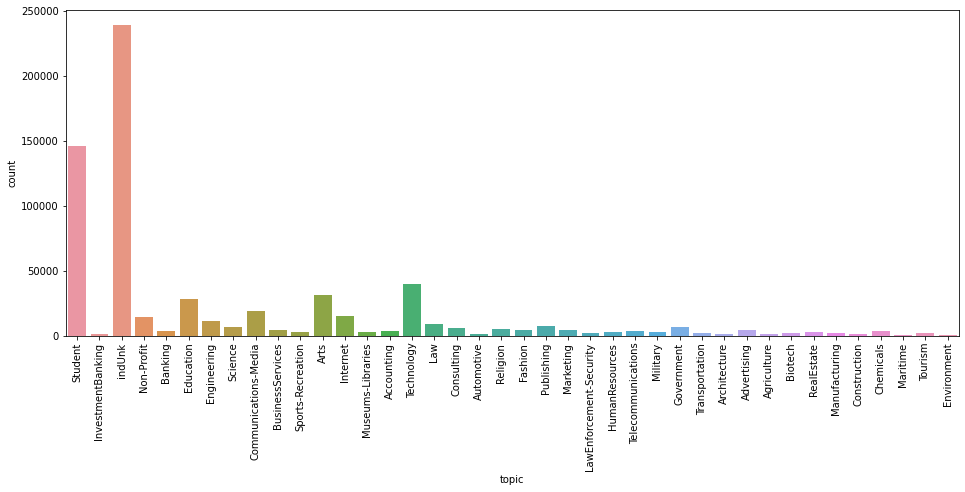

--------------------------------------------------
indUnk                     36.869324
Student                    22.571308
Technology                  6.167687
Arts                        4.777816
Education                   4.390526
Communications-Media        2.961217
Internet                    2.334065
Non-Profit                  2.165993
Engineering                 1.697670
Law                         1.345041
Publishing                  1.150164
Science                     1.060505
Government                  1.011361
Consulting                  0.856230
Religion                    0.779973
Fashion                     0.703871
Marketing                   0.700173
Advertising                 0.688311
BusinessServices            0.651030
Banking                     0.588484
Chemicals                   0.567379
Telecommunications          0.554901
Accounting                  0.550741
Museums-Libraries           0.466012
Military                    0.464163
Sports-Recreation       

In [25]:
# Lets look at the distribution of topic
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(rotation=90)
sns.countplot(x = 'topic', data = df1)
plt.show()

print("-"*50)

# checking the percentage of ham and spam messages
print(df1['topic'].value_counts(normalize = True)*100)

In [ ]:
#observation: from the above graph we observe that the number of count for the value "indUnk" is 36.86%
# and total number of count for the next maximum count value "Student" is 22.57%

In [26]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   text    648859 non-null  object
dtypes: int64(2), object(4)
memory usage: 29.7+ MB


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vect = TfidfVectorizer(max_features = 1000)

data_features = tfidf_vect.fit_transform(df1['text'].apply(lambda data_features:np.str_(data_features)))

data_features = data_features.toarray()

# Feature shape
data_features.shape

(649125, 1000)

In [28]:
data_features[1]

array([0.04246802, 0.02777099, 0.11595524, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02653327, 0.        , 0.        , 0.        , 0.        ,
       0.02614645, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05062748, 0.        ,
       0.        , 0.0522088 , 0.        , 0.        , 0.11772092,
       0.        , 0.        , 0.0545659 , 0.        , 0.        ,
       0.        , 0.05483044, 0.        , 0.0224129 , 0.        ,
       0.        , 0.02353798, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03585497, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02792696, 0.        , 0.02269652, 0.        , 0.        ,
       0.0283572 , 0.        , 0.02090254, 0.        , 0.0928785 ,
       0.03456577, 0.07646621, 0.        , 0.02530303, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
X = data_features

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer()

In [31]:
y = one_hot.fit_transform(df1['topic'])

In [32]:
y.shape

(649125, 39)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   text    648859 non-null  object
dtypes: int64(2), object(4)
memory usage: 29.7+ MB


In [34]:
# Split data into training and testing set.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [65]:
# Training the model using Supervised Learning technique using RandomForestClassifier 

clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train)



RandomForestClassifier()

In [72]:
y_pred_test1 = clf1.predict(X_test)

In [181]:
#saving the trained model.

import joblib

filepath = r'C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/NLP1_Model.pckl'
joblib.dump(clf1, filepath)

['C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/NLP1_Model.pckl']

In [170]:
#Step: 3E
#Clearly print Performance Metrics.

#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_test1)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_test1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_test1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_test1, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_test1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_test1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_test1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_test1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_test1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_test1, average='weighted')))



Accuracy: 0.08

Micro Precision: 0.64
Micro Recall: 0.41
Micro F1-score: 0.50

Macro Precision: 0.27
Macro Recall: 0.12
Macro F1-score: 0.13

Weighted Precision: 0.51
Weighted Recall: 0.41
Weighted F1-score: 0.41


In [182]:
#Calculating the F1 SCore
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_test1, average=None)

array([1.18292474e-02, 8.35683694e-03, 1.06298166e-02, 1.59065490e-02,
       1.95522534e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.95703203e-04, 1.12248267e-02, 2.98271084e-02, 3.66032211e-04,
       2.94334069e-04, 0.00000000e+00, 1.28814083e-01, 1.20996441e-01,
       2.20581119e-01, 1.64400399e-02, 0.00000000e+00, 8.09995692e-02,
       7.94215795e-01, 3.35050543e-01, 3.21233537e-04, 1.20549121e-01,
       1.18630359e-01, 7.13089705e-01, 2.51968670e-01, 7.72298218e-02,
       1.55024281e-02, 9.53539816e-01, 5.61511490e-02, 0.00000000e+00,
       3.91616847e-02, 3.71957629e-02, 4.43677812e-01, 2.12417960e-01,
       4.01909068e-03, 1.16159891e-02, 1.19413531e-01])

In [35]:
#Step: 4
#Improve Performance of model.

#Step: 4A
#Experiment with other vectorisers.

#using the Word2vec technique.

#loading the dataset.

df2 = pd.read_csv("C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/df.csv")

In [36]:
df2.head()

Unnamed: 0       id gender  age              topic      sign          date  \
0           0  2059027   male   15            Student       Leo   14,May,2004   
1           1  2059027   male   15            Student       Leo   12,May,2004   
2           2  2059027   male   15            Student       Leo   12,May,2004   
3           3  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   
4           4  3581210   male   33  InvestmentBanking  Aquarius  10,June,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [38]:
#removing the unnamed column and data column which are less important for building the model.

df2.drop(columns=df2.columns[0], inplace=True, axis=1)


In [39]:
df2 = df2.drop(['date'], axis=1)

In [41]:
df2.head()

id gender  age              topic      sign  \
0  2059027   male   15            Student       Leo   
1  2059027   male   15            Student       Leo   
2  2059027   male   15            Student       Leo   
3  3581210   male   33  InvestmentBanking  Aquarius   
4  3581210   male   33  InvestmentBanking  Aquarius   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [44]:
df2.shape

(649125, 6)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   text    648859 non-null  object
dtypes: int64(2), object(4)
memory usage: 29.7+ MB


In [58]:
df2['text'] = df2['text'].astype('str')

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   text    649125 non-null  object
dtypes: int64(2), object(4)
memory usage: 29.7+ MB


In [60]:
#removing the stop words from the text column.
import numpy as np
import pandas as pd
import string

# defining an empty list
text = []

for i in range(df2.shape[0]):
    
    word = df2['text'][i].split() 
    
    # removing the english language stopwords from the messages
    new_text = [w for w in word if not w in stopwords.words('english')] 
    new_text = ' '.join(new_text) #retriving the original text
    text.append(new_text) # 
    
df2['text'] = text

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      649125 non-null  int64 
 1   gender  649125 non-null  object
 2   age     649125 non-null  int64 
 3   topic   649125 non-null  object
 4   sign    649125 non-null  object
 5   text    649125 non-null  object
dtypes: int64(2), object(4)
memory usage: 29.7+ MB


In [62]:
df2.head(2)

id gender  age    topic sign  \
0  2059027   male   15  Student  Leo   
1  2059027   male   15  Student  Leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [63]:
df2.to_csv(r'C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/df2.csv')

In [17]:
df2.shape

(649125, 7)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  649125 non-null  int64 
 1   id          649125 non-null  int64 
 2   gender      649125 non-null  object
 3   age         649125 non-null  int64 
 4   topic       649125 non-null  object
 5   sign        649125 non-null  object
 6   text        648799 non-null  object
dtypes: int64(3), object(4)
memory usage: 34.7+ MB


In [21]:
df2.head(2)

Unnamed: 0       id gender  age    topic sign  \
0           0  2059027   male   15  Student  Leo   
1           1  2059027   male   15  Student  Leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [23]:
df2.drop(columns=df2.columns[0], inplace=True, axis=1)

In [25]:
df2.head(2)

gender  age    topic sign  \
0   male   15  Student  Leo   
1   male   15  Student  Leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649125 entries, 0 to 649124
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   gender  649125 non-null  object
 1   age     649125 non-null  int64 
 2   topic   649125 non-null  object
 3   sign    649125 non-null  object
 4   text    648799 non-null  object
dtypes: int64(1), object(4)
memory usage: 24.8+ MB


In [29]:
df2['text'] = df2['text'].astype('str')

In [30]:
words_list =[]

for i in df2['text']:
    
    li = list(i.split(" "))
    
    words_list.append(li)

In [32]:
# checking into words_list.
words_list[0:5]

[['info',
  'found',
  'pages',
  'mb',
  'pdf',
  'files',
  'wait',
  'untill',
  'team',
  'leader',
  'processed',
  'learns',
  'html'],
 ['het',
  'kader',
  'van',
  'kernfusie',
  'op',
  'aarde',
  'maak',
  'je',
  'eigen',
  'waterstofbom',
  'build',
  'h',
  'bomb',
  'ascott',
  'tartarus',
  'uwa',
  'edu',
  'au',
  'andrew',
  'scott',
  'newsgroups',
  'rec',
  'humor',
  'subject',
  'build',
  'h',
  'bomb',
  'humorous',
  'date',
  'feb',
  'gmt',
  'organization',
  'university',
  'western',
  'australia',
  'original',
  'file',
  'dated',
  'th',
  'november',
  'transcript',
  'seven',
  'days',
  'article',
  'poorly',
  'formatted',
  'corrupted',
  'added',
  'text',
  'examine',
  'microscope',
  'malleable',
  'like',
  'gold',
  'missing',
  'text',
  'distribute',
  'responsible',
  'accuracy',
  'information',
  'converted',
  'html',
  'dionisio',
  'infinet',
  'com',
  'little',
  'spell',
  'checking',
  'minor',
  'edits',
  'stolen',
  'urllink'

In [33]:
df2.head(2)

gender  age    topic sign  \
0   male   15  Student  Leo   
1   male   15  Student  Leo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [13]:
#Creating Word2vec word embeddings.

import gensim

In [16]:
df2 = pd.read_csv("C:/Users/amitr/OneDrive/Documents/AI&ML/April 2023/Natural Language Processing NLP/Project 1/blogs/df2.csv")

In [16]:
from gensim.models import Word2Vec


In [38]:
#Step: 4B, 4C
#Build classifier Models using other algorithms than base model
#Tune Parameters/Hyperparameters of the model/s.

# Model creation   
model= Word2Vec(words_list, min_count = 1, workers = 4)

In [39]:
model

In [40]:
# saving the model
model.save("word2vec.model")

In [41]:
words = model.wv.vocab
len(words)

575627

In [42]:
word = "distance"
model.wv[word]

array([-2.6708584e+00,  9.6098989e-01,  2.9002478e+00, -3.0712688e+00,
       -2.0057385e+00, -1.2499554e+00,  3.3635429e-01, -1.6670474e+00,
       -2.2661004e+00, -1.8019387e+00, -1.7435387e+00,  1.3013974e+00,
        1.7669781e+00, -6.4057875e-01,  1.8959692e+00,  8.9838892e-01,
       -1.3771012e-01, -2.6478479e+00, -7.9845417e-01, -6.4927244e-01,
        1.0393306e+00,  2.8546715e-01, -1.0134305e+00, -6.8359679e-01,
        1.5005057e+00, -2.1901011e+00,  2.4613471e+00, -1.9979672e+00,
        5.0740165e-01,  1.9157740e+00, -9.4378120e-01, -7.1531075e-01,
        2.5385215e+00, -7.5675821e-01, -1.0985073e+00, -1.5057133e+00,
       -1.4966835e+00, -9.9556792e-01, -1.7054552e+00, -1.0433278e+00,
        1.4419527e+00,  3.8956121e-02, -7.7336794e-01,  6.2492377e-01,
       -1.2888461e+00, -2.0284648e-01,  4.4854665e-01, -2.4241419e+00,
        1.1077980e-03,  5.3446967e-02,  8.2539988e-01,  2.5405815e-01,
        2.2780051e+00, -5.3892970e-01, -4.7723022e-01, -6.4027041e-02,
      

In [ ]:
#Observation:Every word get mapped to an appropriate word index from the whole text present in the data.


In [43]:
# checking the vocab size
print("Length of the vocab is = ", len(list(model.wv.vocab)))

Length of the vocab is =  575627


In [44]:
# Top 10 similar words to the word 'happy'

similar = model.wv.similar_by_word('happy')
print(similar)

[('happier', 0.7222192287445068), ('sad', 0.7020989656448364), ('glad', 0.6859647035598755), ('unhappy', 0.6561856269836426), ('contented', 0.6555705070495605), ('thankful', 0.6207690238952637), ('happiest', 0.6165198683738708), ('wish', 0.600677490234375), ('depressed', 0.5839946269989014), ('suppppppper', 0.5810892581939697)]


In [45]:
#now, next step to build the classifier.

words = model.wv.vocab
wvs = model.wv[words]

In [14]:
from gensim.models import Word2Vec

In [47]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [48]:
def averaged_word_vectorizer(corpus, model, num_features):
    
    vocabulary = set(model.wv.vocab)
    
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    
    return np.array(features)

In [49]:
feature_size = 100

# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = words_list, model = model,
                                             num_features = feature_size)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.961629,0.565962,0.099438,-0.338139,-0.310736,1.561774,-0.057404,-0.186023,-0.544407,0.058974,...,0.121923,-1.116424,0.443032,0.180789,1.017072,-0.685288,-0.105814,0.510424,-0.106734,-0.261673
1,-0.410789,0.581212,0.372710,-0.054627,-0.154308,0.322740,0.011985,-0.524742,0.156513,-0.794564,...,0.196851,0.091701,-0.236395,0.026649,0.349388,0.288924,-0.161998,0.177689,-0.297892,0.797896
2,-2.975366,0.940178,0.711268,0.510112,-1.434268,2.560882,-0.594894,0.883327,-0.802951,-2.287414,...,1.484568,-0.486431,-0.333657,-0.038537,1.470911,1.074450,0.284267,-0.657367,-2.681432,0.206076
3,-0.042365,0.406678,0.919931,-0.349715,-0.385317,-0.060242,-0.087738,-0.097633,-0.023284,0.465526,...,-0.542311,-0.915345,0.065987,-0.737095,1.190175,-1.178951,0.610862,1.150648,-0.551615,1.020352
4,-0.056697,0.285686,0.784889,-0.058910,-0.434846,0.027571,0.055157,-0.457225,0.386787,-0.888295,...,-0.090197,-0.212630,-0.385919,0.244486,-0.107737,0.279614,-0.152792,0.593519,-0.221247,0.903923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649120,-0.276902,0.533963,0.190026,-0.314236,0.727627,0.736463,0.892558,-0.301584,0.432543,-0.944648,...,-0.011822,-0.572455,-0.422265,-0.342812,0.990168,-0.629905,0.205163,0.795168,-0.369057,0.902692
649121,-0.609991,0.104409,-0.076359,-0.072519,-0.224506,0.050620,0.694250,-0.054671,0.456318,-0.995158,...,-0.770931,-0.294441,-0.759910,0.329802,1.114943,0.371346,0.046112,0.177763,-0.383002,1.032634
649122,-0.829851,-0.273438,-0.338545,0.100698,-0.017485,-0.162424,0.951740,0.232492,0.508293,-0.928228,...,-0.944950,-0.409583,-0.461351,-0.819778,1.716309,-0.038340,-0.303580,1.464525,0.248396,-0.108155
649123,-0.405624,0.769860,-0.184279,0.586564,0.322768,-0.133074,0.702338,-0.200870,0.979293,-0.915714,...,-0.481519,-0.450660,-0.802630,0.007098,1.094573,0.269801,0.148593,0.974659,-0.153015,0.737216


In [51]:
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer()

In [52]:
y = one_hot.fit_transform(df2['topic'])

In [55]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(w2v_feature_array,y, test_size=0.25, random_state=42)

In [56]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 7)

In [57]:
# fitting the model on training set
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=7)

In [60]:
#Step: 4D
#Clearly print Performance Metrics.

# making predictions on the test set
y_pred = model.predict(xtest)

In [61]:
# checking the metrics
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.01      0.07      0.02      1147
           1       0.04      0.30      0.06      1244
           2       0.01      0.12      0.02       230
           3       0.01      0.20      0.03       502
           4       0.01      0.28      0.03       595
           5       0.00      0.04      0.00        27
           6       0.01      0.20      0.01        56
           7       0.00      0.04      0.01        52
           8       0.00      0.09      0.01       180
           9       0.01      0.13      0.02       306
          10       0.01      0.12      0.02       805
          11       0.00      0.01      0.00       573
          12       0.01      0.06      0.01       690
          13       0.00      0.05      0.01       196
          14       0.12      0.50      0.20     10074
          15       0.06      0.36      0.11      2098
          16       0.06      0.42      0.11      8730
          17       0.02    

In [62]:
#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(ytest, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(ytest, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(ytest, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(ytest, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(ytest, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(ytest, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(ytest, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(ytest, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(ytest, y_pred, average='weighted')))


Accuracy: 0.06

Micro Precision: 0.67
Micro Recall: 0.41
Micro F1-score: 0.51

Macro Precision: 0.29
Macro Recall: 0.12
Macro F1-score: 0.14

Weighted Precision: 0.52
Weighted Recall: 0.41
Weighted F1-score: 0.41


In [ ]:
#Step: 5 A
#Which vectorizer performed better? Probable reason?.

#Observation: Using the TF-IDF vectorization technique, the micro precision achieved is 64%
# and Micro F1-score achieved is 0.50

#While using the Word2vec vectorization technique, the micro precision achieved is 67% while is better than
# TF-IDF vectoriztion.
# Also, the Micro F1-score achieved with Word2vec is 0.51 which is also better than TF-IDF.

#The reason behind achieving better micro precision with Word2vec is that it uses two-layer neural networks to 
# train the model.
# In Word2vec, words with similar meanings or similar semantics have similar vectors thereby making it
# better Natural Language understanding technique compared to TF-IDF vectorization.

#In the Word2vec, it took the input as a large corpus or document of text and produced a vector space.
#Each unique word in the document is assigned a corresponding vector in the space.
# In the Word2vec word embedding model Word vectors are positioned in the vector space such that words that 
# share common contexts/meaning in the corpus are located close to one another in the space thereby making it
# more precise to predict.
# Embeddings learned through Word2vec have proven to be successful on a variety of Natural Language Processing tasks.

In [64]:
#Step: 5B
#Which model outperformed? Probable reason?.

#The Word2vec performed better than TF-IDF vectorization technique. Both the techniques are trained through 
#RandomForestClassifier Supervised Leearning techniqe.

#Using the TF-IDF vectorization technique, the micro precision achieved is 64%
# and Micro F1-score achieved is 0.50

#While using the Word2vec vectorization technique, the micro precision achieved is 67% while is better than
# TF-IDF vectoriztion.
# Also, the Micro F1-score achieved with Word2vec is 0.51 which is also better than TF-IDF.

#The probable reason is that Word2vec places the words with similar meanings in the corpus to the
# vector space of similar context/meaning words thereby making it more better for prediction and accuracy.


In [ ]:
#Step: 5C
#Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.

# The concept of two-layer neural networks in Word2vec vectorization that are trained to represent the linguistic
# and contextual similarity of words(semantic meaning) through numbers based on their semantics as
# received from the corpus of text it is trained on have helped to gain better accuracy and to predict
# more efficiently as compared to the TF-IDF vectorization technique.

#The another great advantage of the Word2vec approach is that the size of the embedding vector
# is small in comparison to the vocabulary size which helped the model to perform better.

In [ ]:
#Step: 5D
# According to me, which performance metric should be given most importance, why?.

# The performance metrics Precision & Recall should be give most importance in my opinion.

# Because by Precision metrics we check that from all positive predictions how many are correct.
# Out of all benign prediction how many are actually benign.
# The formula for calculating Precision is = TP/(TP + FP)

# Whereas, by Recall metrics we check that from all actual positives how many are predicted as positive.
#The formula for calculating Recall is = TP/(TP + FN)

In [15]:
from nltk.chat.util import Chat, reflections
from nltk.stem import WordNetLemmatizer
import string
import random
import json
import numpy as num


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
#Step: Part B
#Step : 1

#Designing a python based interactive semi - rule based chatbot.

#Importing the corpus.

import json

with open('GL Bot.json') as file:
    Corpus = json.load(file)

In [18]:
#Code for tokenization.

W = []
L = []

doc_x = []
doc_y = []

for intent in Corpus['intents']:
    for pattern in intent['patterns']:
        w_temp = nltk.word_tokenize(pattern)
        L.extend(w_temp)
        doc_x.append(pattern)
        doc_y.append(intent["tag"])
        
    if intent['tag'] not in W:
        W.append(intent['tag'])

In [19]:
lm = WordNetLemmatizer()
L = [lm.lemmatize(word.lower()) for word in L if word not in string.punctuation]
L = sorted(set(L))
W = sorted(set(W))

In [20]:
#Performing Stemming.

#stemmer = PorterStemmer()
Train = []
outEmpty = [0] * len(W)

#Loop to create bag of words and put the frequency count in pn each word

for idx, doc in enumerate(doc_x):
    bag = []
    
    text = lm.lemmatize(doc.lower())
    
    for word in L:
        bag.append(1) if word in text else bag.append(0)
        
            
    outputRow = list(outEmpty)
    outputRow[W.index(doc_y[idx])] = 1
    
    Train.append([bag, outputRow])  #list
random.shuffle(Train)
    
Train = num.array(Train, dtype=object)
    
x = num.array(list(Train[:,0]))
y = num.array(list(Train[:,1]))



In [21]:
import tensorflow as tensorF
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

ishape = (len(x[0]),)
oshape = len(y[0])

model = Sequential()

model.add(Dense(128, input_shape=ishape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(oshape,activation="softmax"))

md = tensorF.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=md, metrics=["accuracy"])

print(model.summary())

model.fit(x, y, epochs=15, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               20352     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
4/4 [==============================] - 0s 4ms/step - loss: 2.1041 - accuracy: 0.1406
Epoch 2/15
4/4 [=

In [43]:
#text chat utility function.
import random

def ourText(text):
    newtkns = nltk.word_tokenize(text)
    newtkns = [lm.lemmatize(word) for word in newtkns]
    return newtkns

def wordBag(text,vocab):
    newtkns = ourText(text)
    bagofWords = [0] * len(vocab)
    
    for w in newtkns:
        for idx, word in enumerate(vocab):
            if word == w:
                bagofWords[idx] =1
    return num.array(bagofWords)

def Pclass(text, vocab, labels):
    bagofWords = wordBag(text, vocab)
    ourResult = model.predict(num.array([bagofWords]))[0]
    newThresh = 0.2
    yp = [[idx, res] for idx, res in enumerate(ourResult) if res > newThresh]
    
    yp.sort(key=lambda x: x[1], reverse=True)
    newList = []
    
    for r in yp:
        newList.append(labels[r[0]])
    return newList

def getRes(firstlist, fJson):
    tag = firstlist[0]
    listofIntents = fJson["intents"]
    for i in listofIntents:
        if i["tag"] == tag:
            ourResult = random.choice(i["responses"])
            break
    return ourResult


                

In [54]:
#Step: 1
#Start chat session with greetings and ask what the user is looking for.

#Step: 2
#Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

#Step: 3
#End the chat session only if the user requests 
# to end else ask what the user is looking for. Loop continues till the user asks to end it.

while True:
    newMessage = input("")
    if newMessage.lower()=="quit":
        break
    
    if newMessage.lower()=="*":
        print("Please rephrase your question and try:")
    else:
        intents = Pclass(newMessage, L, W)
        ourResult = getRes(intents, Corpus)
        print(ourResult)

           
            

hi
Hello! how can i help you ?
iwant to know machine
Link: Machine Learning wiki 
you have not help me 
Tarnsferring the request to your PM
you are bad
Please use respectful words
what is yourname
Hello! how can i help you ?
what is your name
I am your virtual learning assistant
i hate you
Please use respectful words
thank you
I hope I was able to assist you, Good Bye
quit
